# OpenCV Image Manipulation Tutorial

This notebook demonstrates basic image manipulation operations using OpenCV:
- Loading and displaying images
- Resizing images (fixed size and scaling)
- Cropping images
- Color space conversions

**Important:** Make sure to update the `image_path` variable below to point to your actual image file.

In [1]:
import cv2
import numpy as np
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
# Display images inline in Jupyter
%matplotlib inline

In [3]:
# --- Configuration ---
image_path = r'C:\Users\pc\Desktop\90DayML\openCV\sample.jpg'  # <<<<<<< IMPORTANT: Change this to your image file
output_dir = 'output_images/'    # Directory to save processed images

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"OpenCV Version: {cv2.__version__}")
print(f"NumPy Version: {np.__version__}")

OpenCV Version: 4.8.1
NumPy Version: 1.24.3


## 1. Load and Display the Image


Original Image Properties:
  Shape (Height, Width, Channels): (867, 1300, 3)
  Data Type: uint8
  Size (Total Pixels): 3381300


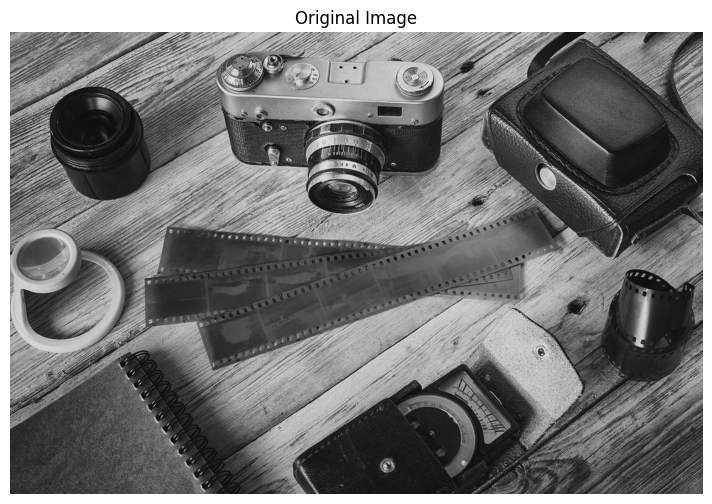

In [4]:
# --- 1. Load the Image ---
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and file name.")
    # Don't exit in Jupyter, just show error
else:
    print(f"\nOriginal Image Properties:")
    print(f"  Shape (Height, Width, Channels): {img.shape}")
    print(f"  Data Type: {img.dtype}")
    print(f"  Size (Total Pixels): {img.size}")
    
    # Convert BGR to RGB for proper display in Jupyter
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

## 2. Resizing Images


Resized to Fixed Size (300x200) Properties:
  Shape: (200, 300, 3)
  Saved: output_images/resized_fixed.jpg


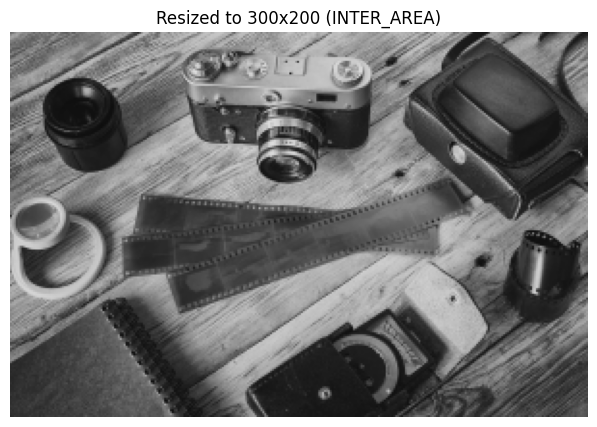

In [5]:
# --- 2. Resizing Images ---
if img is not None:
    # 2.1 Resize to a fixed size (e.g., 300x200 pixels)
    new_width_fixed, new_height_fixed = 300, 200
    resized_fixed = cv2.resize(img, (new_width_fixed, new_height_fixed), interpolation=cv2.INTER_AREA)
    # INTER_AREA is generally preferred for shrinking an image

    print(f"\nResized to Fixed Size ({new_width_fixed}x{new_height_fixed}) Properties:")
    print(f"  Shape: {resized_fixed.shape}")
    
    # Save and display
    cv2.imwrite(os.path.join(output_dir, 'resized_fixed.jpg'), resized_fixed)
    print(f"  Saved: {os.path.join(output_dir, 'resized_fixed.jpg')}")
    
    # Display in Jupyter
    resized_fixed_rgb = cv2.cvtColor(resized_fixed, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 5))
    plt.imshow(resized_fixed_rgb)
    plt.title(f'Resized to {new_width_fixed}x{new_height_fixed} (INTER_AREA)')
    plt.axis('off')
    plt.show()


Resized to Half Size (Scale Factor: 0.5) Properties:
  Shape: (434, 650, 3)
  Saved: output_images/resized_half.jpg


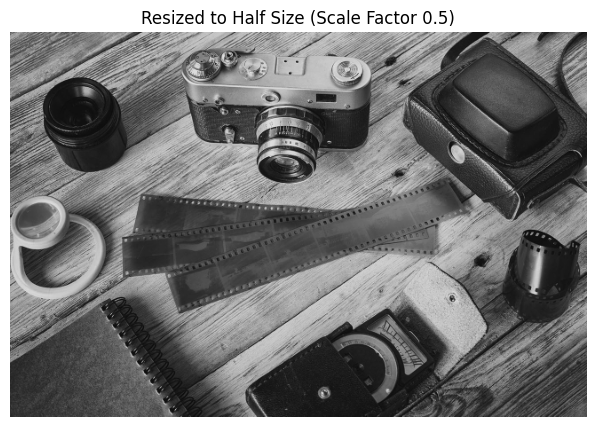

In [6]:
if img is not None:
    # 2.2 Resize by a scaling factor (e.g., half size)
    scale_factor = 0.5
    resized_half = cv2.resize(img, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    # INTER_LINEAR is good for general scaling
    
    print(f"\nResized to Half Size (Scale Factor: {scale_factor}) Properties:")
    print(f"  Shape: {resized_half.shape}")
    
    cv2.imwrite(os.path.join(output_dir, 'resized_half.jpg'), resized_half)
    print(f"  Saved: {os.path.join(output_dir, 'resized_half.jpg')}")
    
    # Display in Jupyter
    resized_half_rgb = cv2.cvtColor(resized_half, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 5))
    plt.imshow(resized_half_rgb)
    plt.title(f'Resized to Half Size (Scale Factor {scale_factor})')
    plt.axis('off')
    plt.show()


Resized to Double Size (Scale Factor: 2.0) Properties:
  Shape: (1734, 2600, 3)
  Saved: output_images/resized_double.jpg


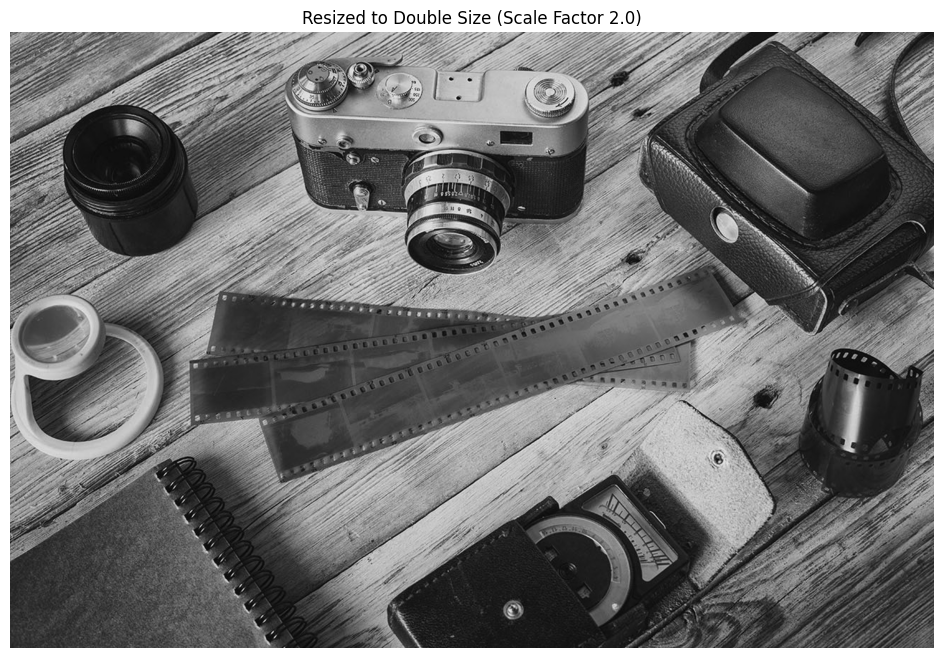

In [7]:
if img is not None:
    # 2.3 Resize by a scaling factor (e.g., double size)
    scale_factor_double = 2.0
    resized_double = cv2.resize(img, (0, 0), fx=scale_factor_double, fy=scale_factor_double, interpolation=cv2.INTER_CUBIC)
    # INTER_CUBIC is good for enlarging an image (slower but higher quality)
    
    print(f"\nResized to Double Size (Scale Factor: {scale_factor_double}) Properties:")
    print(f"  Shape: {resized_double.shape}")
    
    cv2.imwrite(os.path.join(output_dir, 'resized_double.jpg'), resized_double)
    print(f"  Saved: {os.path.join(output_dir, 'resized_double.jpg')}")
    
    # Display in Jupyter (might be large, so we'll show a smaller version)
    resized_double_rgb = cv2.cvtColor(resized_double, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(resized_double_rgb)
    plt.title(f'Resized to Double Size (Scale Factor {scale_factor_double})')
    plt.axis('off')
    plt.show()

## 3. Cropping Images


Cropped Image Properties:
  Shape: (150, 150, 3)
  Saved: output_images/cropped_image.jpg


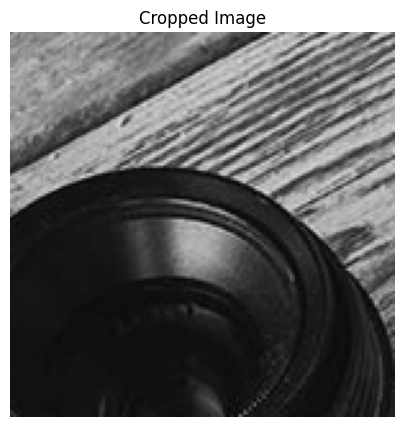

In [8]:
# --- 3. Cropping Images (using NumPy slicing) ---
if img is not None:
    # Define the region of interest (ROI) - [startY:endY, startX:endX]
    # Example: crop a 100x150 region starting from row 50, col 100
    start_row, end_row = 50, 200  # Rows 50 to 199
    start_col, end_col = 100, 250  # Columns 100 to 249

    # Ensure the crop coordinates are within image bounds
    height, width = img.shape[:2]
    if start_row >= height or end_row > height or start_col >= width or end_col > width:
        print("\nWarning: Crop coordinates are out of image bounds. Skipping cropping example.")
    else:
        cropped_img = img[start_row:end_row, start_col:end_col]

        print(f"\nCropped Image Properties:")
        print(f"  Shape: {cropped_img.shape}")
        
        cv2.imwrite(os.path.join(output_dir, 'cropped_image.jpg'), cropped_img)
        print(f"  Saved: {os.path.join(output_dir, 'cropped_image.jpg')}")
        
        # Display in Jupyter
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 5))
        plt.imshow(cropped_img_rgb)
        plt.title('Cropped Image')
        plt.axis('off')
        plt.show()

## 4. Color Conversions


Grayscale Image Properties:
  Shape: (867, 1300)
  Saved: output_images/grayscale_image.jpg


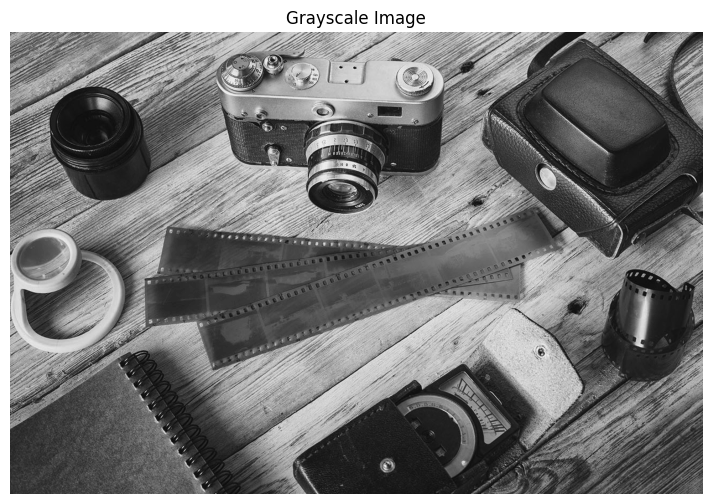

In [9]:
# --- 4. Color Conversions ---
if img is not None:
    # 4.1 Convert to Grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(f"\nGrayscale Image Properties:")
    print(f"  Shape: {gray_img.shape}")  # No channel dimension for grayscale
    
    cv2.imwrite(os.path.join(output_dir, 'grayscale_image.jpg'), gray_img)
    print(f"  Saved: {os.path.join(output_dir, 'grayscale_image.jpg')}")
    
    # Display in Jupyter
    plt.figure(figsize=(10, 6))
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()


HSV Image Properties:
  Shape: (867, 1300, 3)
  Saved: output_images/hsv_image.jpg


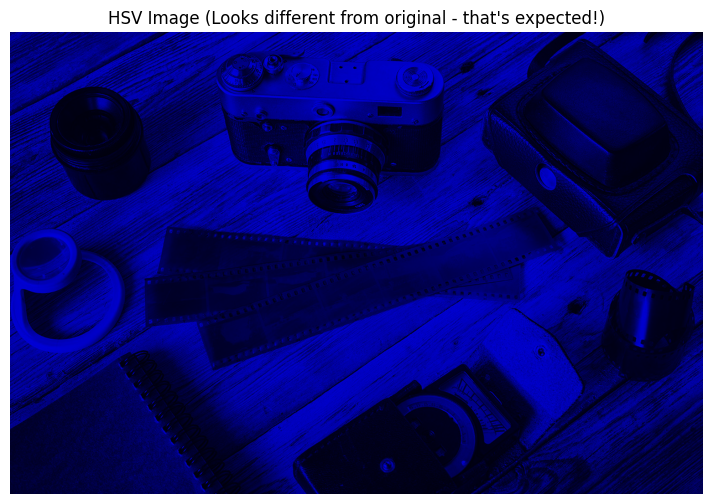

In [10]:
if img is not None:
    # 4.2 Convert to HSV (Hue, Saturation, Value)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    print(f"\nHSV Image Properties:")
    print(f"  Shape: {hsv_img.shape}")
    
    cv2.imwrite(os.path.join(output_dir, 'hsv_image.jpg'), hsv_img)
    print(f"  Saved: {os.path.join(output_dir, 'hsv_image.jpg')}")
    
    # Display in Jupyter (HSV looks different from original - that's expected!)
    plt.figure(figsize=(10, 6))
    plt.imshow(hsv_img)
    plt.title('HSV Image (Looks different from original - that\'s expected!)')
    plt.axis('off')
    plt.show()


BGR from HSV Properties:
  Shape: (867, 1300, 3)
  Saved: output_images/bgr_from_hsv.jpg


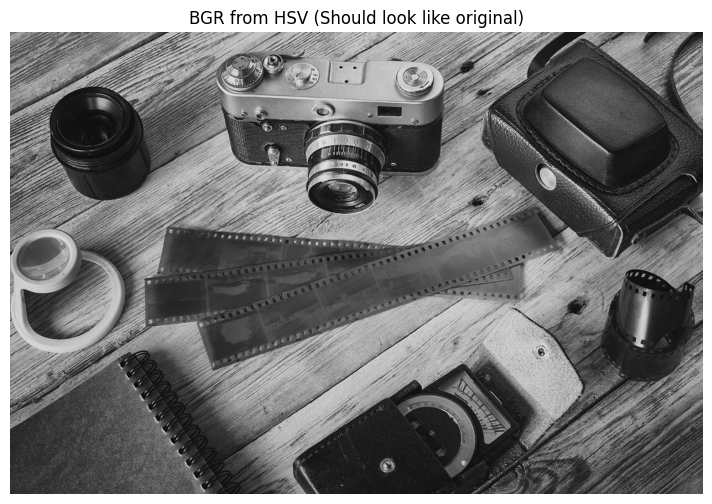


--- All image manipulations demonstrated. Notebook finished. ---


In [11]:
if img is not None:
    # 4.3 Convert back from HSV to BGR (to verify)
    bgr_from_hsv = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)
    print(f"\nBGR from HSV Properties:")
    print(f"  Shape: {bgr_from_hsv.shape}")
    
    cv2.imwrite(os.path.join(output_dir, 'bgr_from_hsv.jpg'), bgr_from_hsv)
    print(f"  Saved: {os.path.join(output_dir, 'bgr_from_hsv.jpg')}")
    
    # Display in Jupyter
    bgr_from_hsv_rgb = cv2.cvtColor(bgr_from_hsv, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(bgr_from_hsv_rgb)
    plt.title('BGR from HSV (Should look like original)')
    plt.axis('off')
    plt.show()

print("\n--- All image manipulations demonstrated. Notebook finished. ---")

## Summary

This notebook demonstrated:
1. **Loading images** with `cv2.imread()`
2. **Resizing images** using different methods:
   - Fixed size with `cv2.resize()`
   - Scaling factors with `fx` and `fy` parameters
   - Different interpolation methods (INTER_AREA, INTER_LINEAR, INTER_CUBIC)
3. **Cropping images** using NumPy array slicing
4. **Color space conversions**:
   - BGR to Grayscale
   - BGR to HSV
   - HSV back to BGR

**Next Steps:**
- Try with your own images by updating the `image_path` variable
- Experiment with different resize dimensions and scaling factors
- Try different crop regions
- Explore other color spaces like LAB, YUV, etc.